# Importe

In [1]:
# Data related libraries
import numpy as np
import pandas as pd
# Plotting
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
from IPython.display import display, HTML
# Convenient helpers
from copy import copy
from time import time
from collections import defaultdict, Counter
from sklearn.preprocessing import minmax_scale
# Printing libraries and settings
# import warnings; warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format','{0:.2f}'.format)
%matplotlib inline

# Warungen nur einmal anzeigen
import warnings
warnings.filterwarnings('ignore')

# Laden der Daten

In [2]:
# Laden der Daten
data  = pd.read_csv('../data/gntm.csv')
data.head()

,Staffel,Teilnehmerin,Platzierung,Alter,Größe (cm),Haarfarbe,Augenfarbe,Hautfarbe,Brustumfang (cm),Taillenumfang (cm),Hüftumfang (cm),Kleidergröße,Schuhgröße
0,1,Lena Gercke,1.00,17,178.00,blond,blau,hell,90.00,62.00,90.00,36.00,39.00
1,1,Yvonne Schröder,2.00,17,174.00,blond,blau,hell,nan,nan,nan,nan,nan
2,1,Jennifer Wanderer,3.00,17,178.00,braun,NaN,hell,nan,nan,nan,nan,nan
3,1,Janina Ortmann,4.00,20,173.00,blond,grün,hell,85.00,59.00,89.00,nan,40.00
4,1,Lena Meier,5.00,20,180.00,braun,grün,hell,83.00,61.00,89.00,36.00,40.00


In [3]:
# Basisinfos über die Daten
data.describe()

,Staffel,Platzierung,Alter,Größe (cm),Brustumfang (cm),Taillenumfang (cm),Hüftumfang (cm),Kleidergröße,Schuhgröße
count,277.00,276.00,277.00,251.00,132.00,132.00,132.00,57.00,77.00
mean,7.77,11.40,19.04,176.91,84.38,63.29,90.38,35.19,39.36
std,3.64,6.78,2.21,3.23,3.82,3.08,3.55,1.06,1.14
min,1.00,1.00,16.00,169.00,71.00,56.00,80.00,32.00,36.00
25%,5.00,6.00,17.00,175.00,82.00,61.00,89.00,34.00,39.00
50%,8.00,11.00,19.00,177.00,84.00,63.00,90.00,36.00,39.00
75%,11.00,16.00,20.00,179.00,87.00,65.00,93.00,36.00,40.00
max,13.00,29.00,25.00,187.00,98.00,72.00,98.00,36.00,42.00


# Features hinzufügen und plotten

In [4]:
# "Proportionen" könnten interessant sein
# HB = Hüftumfang / Brustumfang
# TB = Taillenumfang / Brustumfang
# HT = Hüftumfang / Taillenumfang
# GM = Geometrisches Mittel
from scipy.stats import gmean

data['HB'] = data['Hüftumfang (cm)'] / data['Brustumfang (cm)']
data['TB'] = data['Taillenumfang (cm)'] / data['Brustumfang (cm)']
data['TH'] = data['Taillenumfang (cm)'] / data['Hüftumfang (cm)']
data['GM'] = gmean(data[['Brustumfang (cm)','Taillenumfang (cm)','Hüftumfang (cm)']], axis=1)
data.head()

,Staffel,Teilnehmerin,Platzierung,Alter,Größe (cm),Haarfarbe,Augenfarbe,Hautfarbe,Brustumfang (cm),Taillenumfang (cm),Hüftumfang (cm),Kleidergröße,Schuhgröße,HB,TB,TH,GM
0,1,Lena Gercke,1.00,17,178.00,blond,blau,hell,90.00,62.00,90.00,36.00,39.00,1.00,0.69,0.69,79.49
1,1,Yvonne Schröder,2.00,17,174.00,blond,blau,hell,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,1,Jennifer Wanderer,3.00,17,178.00,braun,NaN,hell,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,1,Janina Ortmann,4.00,20,173.00,blond,grün,hell,85.00,59.00,89.00,nan,40.00,1.05,0.69,0.66,76.42
4,1,Lena Meier,5.00,20,180.00,braun,grün,hell,83.00,61.00,89.00,36.00,40.00,1.07,0.73,0.69,76.67


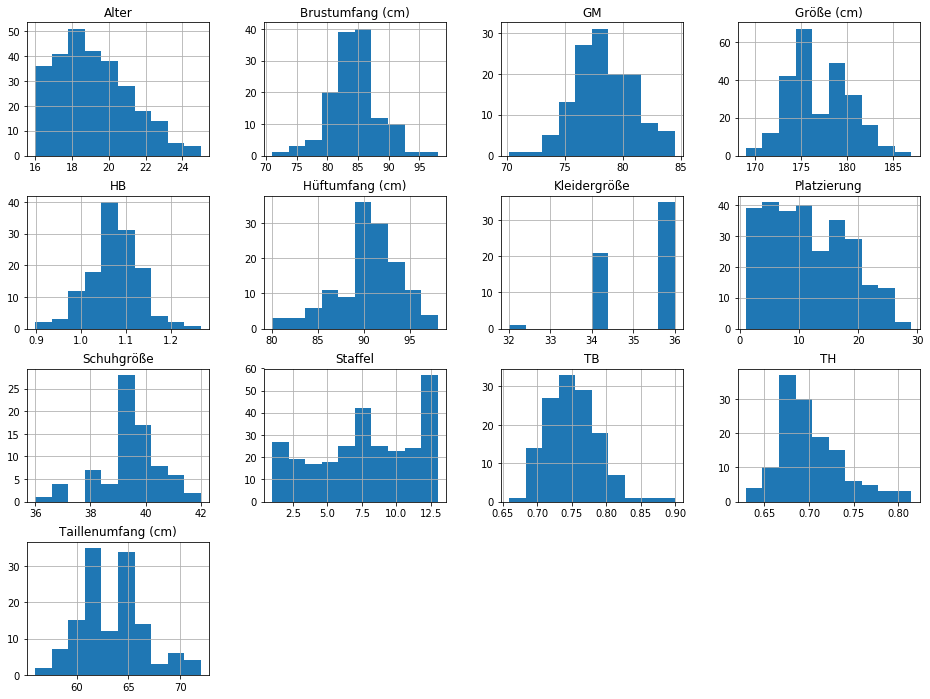

In [5]:
# Basishistogramme
data.hist(figsize=(16,12), bins=10);

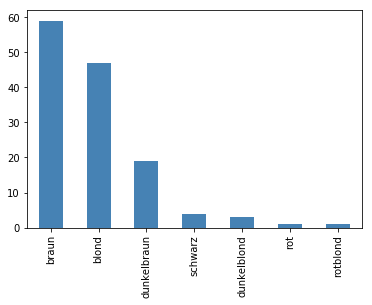

In [6]:
# Nominale Attribute plotten
data['Haarfarbe'].value_counts().plot.bar(color='steelblue');

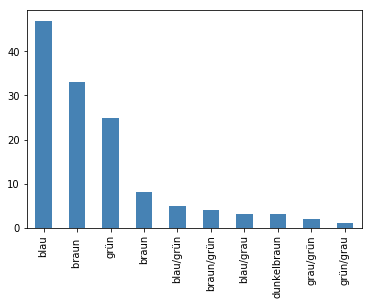

In [7]:
data['Augenfarbe'].value_counts().plot.bar(color='steelblue');

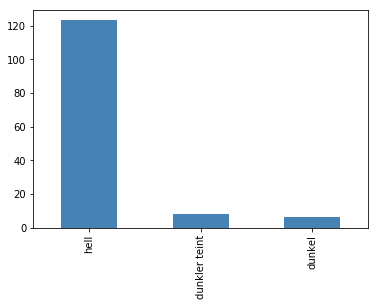

In [8]:
data['Hautfarbe'].value_counts().plot.bar(color='steelblue');

# Lebenszeit berechnen und NANs entfernen

In [9]:
# Berechne Lebenszeit
episoden = data.groupby('Staffel').count()['Platzierung'][data['Staffel']]
episoden.index = data.index
data['Lebenszeit'] = episoden - data['Platzierung'] + 1
# Berechne skalierte Lebenszeit
data['Lebenszeit (skaliert)'] = data['Lebenszeit']/episoden

In [10]:
# Existing Values
len(data)-data.isnull().sum()

Staffel                  277
Teilnehmerin             277
Platzierung              276
Alter                    277
Größe (cm)               251
Haarfarbe                134
Augenfarbe               131
Hautfarbe                137
Brustumfang (cm)         132
Taillenumfang (cm)       132
Hüftumfang (cm)          132
Kleidergröße              57
Schuhgröße                77
HB                       132
TB                       132
TH                       132
GM                       132
Lebenszeit               276
Lebenszeit (skaliert)    276
dtype: int64

In [11]:
# Daten bereinigen:
data_clean = data[[#'Staffel',
                   'Teilnehmerin',
                   'Alter', 
                   'Größe (cm)', 
                   #'Haarfarbe', 
                   #'Augenfarbe', 
                   #'Hautfarbe',
                   'Brustumfang (cm)', 
                   'Taillenumfang (cm)', 
                   'Hüftumfang (cm)', 
                   'HB', 
                   'TB', 
                   'TH', 
                   'GM', 
                   #'Platzierung', 
                   'Lebenszeit',
                   'Lebenszeit (skaliert)'
                ]]
print('Voller Datensatz {}'.format(data_clean.shape))
print('Bereinigter Datensatz {}'.format(data_clean.dropna().shape))
data_clean = data_clean.dropna()
data_clean.index = range(len(data_clean))

Voller Datensatz (277, 12)
Bereinigter Datensatz (132, 12)


# Kategorielle Attribute bearbeiten

In [12]:
## Liste kategorieller Attribute
##to_split = ['Haarfarbe','Augenfarbe', 'Hautfarbe']
#
## Kategorielle Attribute als Index-Attribute hinzufügen
#for s in to_split:
#    # Erzeuge Dataframe mit one-hot-encoded Spalten
#    split = pd.get_dummies(data[s])
#    # Neue Spaltennamen: 'column_name = category'
#    column_names = ["%s=%s"%(s,x) for x in split.columns]
#    # Neue Spaltennamen den Spalten zuordnen
#    split.columns = column_names
#    # Neue Spalten dem ursprünglichen Dataframe hinzufügen
#    data_clean[column_names] = split
#
## Originalattribute löschen
#for s in to_split:
#    data_clean.drop(s, axis=1, inplace=True)
#
#data_clean.head()

In [13]:
# Nur numerische Einträge verwenden
data_num = data_clean._get_numeric_data()
data_num.head()

,Alter,Größe (cm),Brustumfang (cm),Taillenumfang (cm),Hüftumfang (cm),HB,TB,TH,GM,Lebenszeit,Lebenszeit (skaliert)
0,17,178.00,90.00,62.00,90.00,1.00,0.69,0.69,79.49,12.00,1.00
1,20,173.00,85.00,59.00,89.00,1.05,0.69,0.66,76.42,9.00,0.75
2,20,180.00,83.00,61.00,89.00,1.07,0.73,0.69,76.67,8.00,0.67
3,18,183.00,88.00,64.00,80.00,0.91,0.73,0.80,76.66,8.00,0.67
4,16,175.00,86.00,66.00,85.00,0.99,0.77,0.78,78.43,6.00,0.50


In [14]:
# Train/Test Split erstellen
from sklearn.model_selection import train_test_split
attributes = [c for c in data_num.columns if 'Lebenszeit' not in c]
target = 'Lebenszeit (skaliert)'
X_train, X_test = train_test_split(data_num, train_size=.75, test_size=.25, random_state=23)

y_train = X_train[target]
y_test = X_test[target]

X_train = X_train[attributes]
X_test = X_test[attributes]

# Regressionsmodelle als Baseline

In [15]:
def plot_true_v_pred(model, X_train, X_test, y_train, y_test, label=None, title=None):             
    """Produces a scatter plot where the true values are given on the x-axis and the predicted
values are on the y-axis.                                                                     
                                                                                              
        Args:                                                                                 
            model:              sklearn model used to predict values                          
            X_train:            pandas.Dataframe with features used for training              
            X_test:             pandas.Dataframe with features used for testing               
            y_train:            pandas.DataFrame or Series with labels used for training      
            y_test:             pandas.DataFrame or Series with labels used for testing       
            label:              Name of the label                                             
            title:              Optional title for the plot                                   
                                                                                              
    """                                                                                       
    fig, ax = plt.subplots(figsize=(9,6))                                                     
    ax.scatter(y_train,model.predict(X_train), s=50, label='Training Data')            
    ax.scatter(y_test,model.predict(X_test), s=50, label='Test Data')                  
    if label != None:
        ax.set_xlabel('True values for {}'.format(label)) 
        ax.set_ylabel('Predicted values for {}'.format(label))                                    
    if title != None:                                                                         
        ax.set_title(title)                                                                   
    ax.legend()                                                                               
    fig.show()                                                                                

In [16]:
from sklearn.metrics import regression as re

## Lineare Regression

In [17]:
# Model via linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
parameters = {'normalize': [True,False]}
lr = LinearRegression(n_jobs=-1)
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

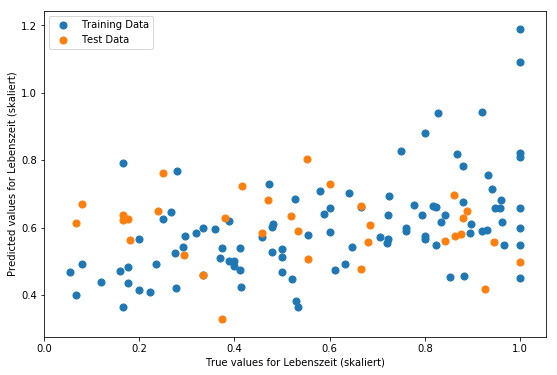

In [18]:
plot_true_v_pred(lr, X_train, X_test, y_train, y_test, 'Lebenszeit (skaliert)');

## Lasso Regression

In [19]:
# Lasso Regression
from sklearn.linear_model import Lasso

parameters = {'alpha':np.logspace(-5,0,6)}

model = Lasso(max_iter=5000)
models = GridSearchCV(model, parameters, cv=5, refit=True)
models.fit(X_train, y_train)
lasso = models.best_estimator_

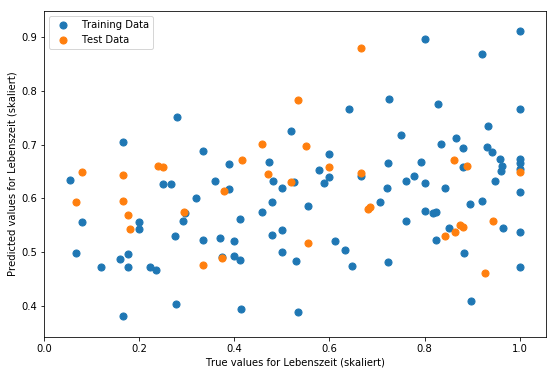

In [20]:
plot_true_v_pred(lasso, X_train, X_test, y_train, y_test, 'Lebenszeit (skaliert)');

## Ridge Regression

In [21]:
from sklearn.linear_model import Ridge
parameters = {'alpha':np.logspace(-6,6,13)}

model = Ridge()

models = GridSearchCV(model, parameters, cv=5, refit=True)
models.fit(X_train, y_train)
ridge = models.best_estimator_

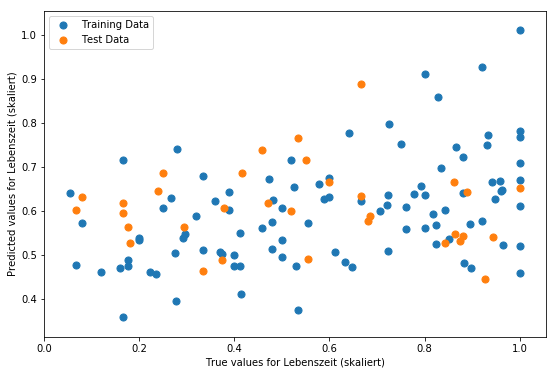

In [22]:
plot_true_v_pred(ridge, X_train, X_test, y_train, y_test, 'Lebenszeit (skaliert)');

In [40]:
from collections import Counter
def plot_weights(model):
    values = model.coef_.flatten()
    names = X_train.columns.tolist()

    fig, ax = plt.subplots(figsize=(8,2))
    ax.bar(range(len(values)), values, align='center', color='k', alpha=0.3)
    plt.xticks(range(len(values)), names, rotation=90)
    ax.set_xlim([-1, len(values)])
    ax.set_ylabel('Weight')

    # beautyfy the plot
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    plt.show()

i4 = interact(plot_weights, model={'Linear model':lr, 'Ridge':ridge, 'Lasso':lasso})

interactive(children=(Dropdown(description='model', options={'Linear model': LinearRegression(copy_X=True, fit…

## Entscheidungsbäume

In [24]:
# Model via regression tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
parameters = {'criterion': ['mse','friedman_mse', 'mae'], 
              'max_depth': np.linspace(1,5,5), 
              'min_samples_leaf': [5,10,15,20,25]}
rt = DecisionTreeRegressor()
regs = GridSearchCV(rt, parameters, cv=5)
regs.fit(X_train, y_train)
rt_cv = regs.best_estimator_

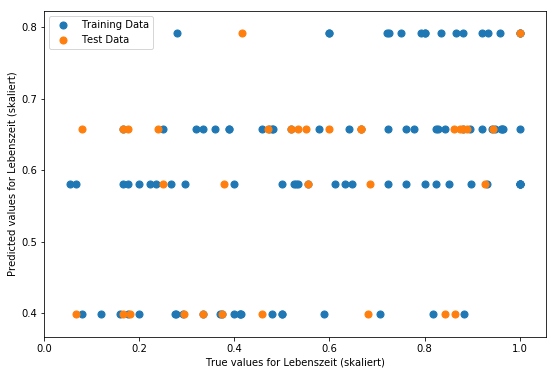

In [25]:
plot_true_v_pred(rt_cv, X_train, X_test, y_train, y_test, 'Lebenszeit (skaliert)');

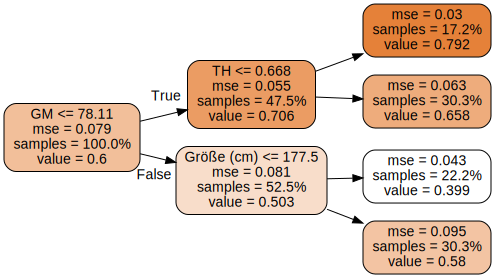

In [35]:
# display the tree
from IPython.display import SVG
from graphviz import Source
from sklearn import tree
graph = Source(tree.export_graphviz(rt_cv, out_file=None, 
                                    feature_names=attributes, 
                                    filled=True, 
                                    rounded=True, 
                                    rotate=True,
                                    impurity=True,
                                    proportion=True
                                   ))
SVG(graph.pipe(format='svg'))

## Random Forests

In [43]:
# Model via a Random Forest
from sklearn.ensemble import RandomForestRegressor
parameters = {'criterion': ['mse','friedman_mse', 'mae'], 
              'max_depth': np.linspace(1,5,5), 
              'min_samples_leaf': [5,10,15,20,25]}
model = RandomForestRegressor()
regs = GridSearchCV(model, parameters, cv=5)
regs.fit(X_train, y_train)
rf_cv = regs.best_estimator_

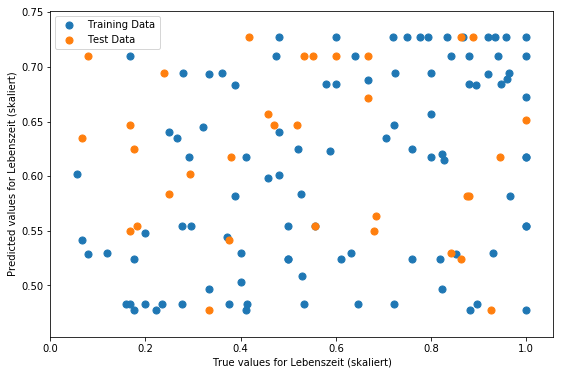

In [44]:
plot_true_v_pred(rf_cv, X_train, X_test, y_train, y_test, 'Lebenszeit (skaliert)');

## Support Vector Regression

In [46]:
# Model via support vector machine
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':['rbf'], 
              'C':10.0**np.arange(-4, 4), 
              'epsilon':[0.1, 0.2]}
model = SVR()
regs = GridSearchCV(model, parameters, cv=10)
regs.fit(X_train, y_train)
svr = regs.best_estimator_

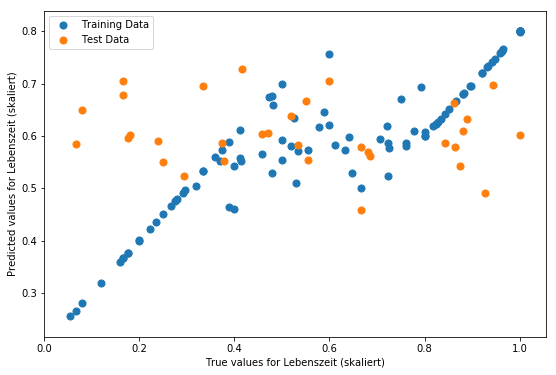

In [47]:
plot_true_v_pred(svr, X_train, X_test, y_train, y_test, 'Lebenszeit (skaliert)');

In [49]:
# Evaluation der Regressionsmodelle:
print('Lineare Regression       : {}'.format(re.r2_score(y_pred=lr.predict(X_test), y_true=y_test)))
print('Lasso Regression         : {}'.format(re.r2_score(y_pred=lasso.predict(X_test), y_true=y_test)))
print('Ridge Regression         : {}'.format(re.r2_score(y_pred=ridge.predict(X_test), y_true=y_test)))
print('Regression Tree          : {}'.format(re.r2_score(y_pred=rt_cv.predict(X_test), y_true=y_test)))
print('Random Forest            : {}'.format(re.r2_score(y_pred=rf_cv.predict(X_test), y_true=y_test)))
print('Support Vector Regression: {}'.format(re.r2_score(y_pred=svr.predict(X_test), y_true=y_test)))

Lineare Regression       : -0.29733080295880243
Lasso Regression         : -0.21189617764694524
Ridge Regression         : -0.21637244536538325
Regression Tree          : 0.02106143921333037
Random Forest            : -0.2010728986344137
Support Vector Regression: -0.1884158957577302


# Survival-Modelle

In [53]:
from lifelines import CoxPHFitter

# Train/Test Split erstellen
from sklearn.model_selection import train_test_split
attributes = [c for c in data_num.columns if 'Lebenszeit' not in c]
target = 'Lebenszeit (skaliert)'
X_train, X_test = train_test_split(data_num, train_size=.75, test_size=.25, random_state=23)

cph = CoxPHFitter()
cph.fit(X_train, duration_col='Lebenszeit (skaliert)')

cph.print_summary()

<lifelines.CoxPHFitter: fitted with 99 observations, 0 censored>
      duration col = 'Lebenszeit (skaliert)'
number of subjects = 99
  number of events = 99
    log-likelihood = -296.61
  time fit was run = 2019-03-19 13:18:02 UTC

---
                      coef                                          exp(coef)  se(coef)     z      p  -log2(p)  lower 0.95  upper 0.95
Alter                 0.12                                               1.13      0.05  2.30   0.02      5.53        0.02        0.23
Größe (cm)           -0.01                                               0.99      0.04 -0.28   0.78      0.36       -0.09        0.07
Brustumfang (cm)     -2.41                                               0.09      1.13 -2.12   0.03      4.90       -4.63       -0.19
Taillenumfang (cm)   -0.85                                               0.43      2.88 -0.30   0.77      0.38       -6.49        4.79
Hüftumfang (cm)      -3.04                                               0.05      1.59 

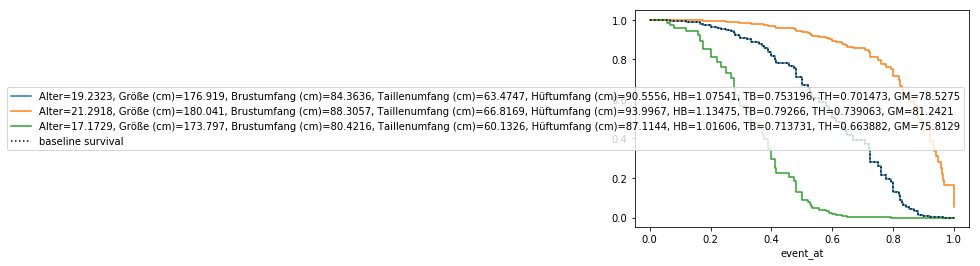

In [62]:
cph.plot_covariate_groups(attributes, np.array([X_train[attributes].mean().values, 
                                                X_train[attributes].mean().values+X_train[attributes].std().values,
                                                X_train[attributes].mean().values-X_train[attributes].std().values
                                               ]))

In [65]:
unconditioned_sf = cph.predict_survival_function(X_test)
unconditioned_sf.head()

,10,18,3,16,114,88,47,112,2,93,107,97,115,124,73,130,30,7,28,67,5,9,77,50,54,24,128,53,20,106,44,94,104
event_at,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
0.06,1.00,0.99,0.99,1.00,1.00,0.98,0.98,1.00,0.99,0.97,1.00,0.98,1.00,1.00,1.00,1.00,1.00,0.99,1.00,0.98,0.99,0.97,1.00,0.98,1.00,0.97,1.00,1.00,0.98,1.00,0.99,1.00,1.00
0.07,1.00,0.98,0.97,0.99,1.00,0.95,0.96,1.00,0.98,0.95,0.99,0.96,1.00,1.00,1.00,0.99,1.00,0.97,1.00,0.96,0.97,0.94,1.00,0.95,1.00,0.95,1.00,1.00,0.96,1.00,0.98,1.00,1.00
0.08,0.99,0.97,0.96,0.99,0.99,0.93,0.93,1.00,0.97,0.92,0.99,0.94,0.99,1.00,1.00,0.99,1.00,0.96,0.99,0.93,0.96,0.91,1.00,0.93,0.99,0.92,1.00,1.00,0.94,1.00,0.97,1.00,1.00
0.12,0.99,0.96,0.94,0.98,0.99,0.90,0.91,1.00,0.97,0.89,0.99,0.92,0.99,1.00,1.00,0.99,0.99,0.95,0.99,0.91,0.94,0.87,1.00,0.91,0.99,0.89,1.00,1.00,0.92,0.99,0.96,1.00,1.00


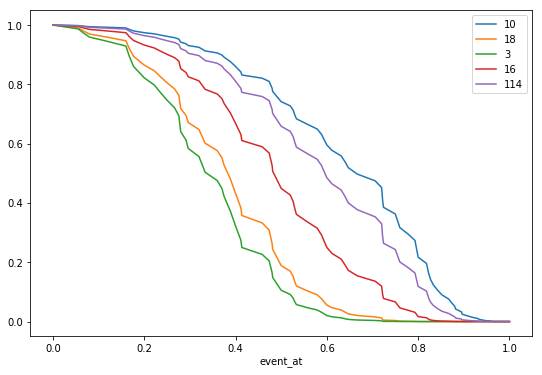

In [66]:
subjects = unconditioned_sf.columns[:5]
unconditioned_sf[subjects].plot(figsize=(9,6));
plt.legend()

In [63]:
data.iloc[[19,76]]

,Staffel,Teilnehmerin,Platzierung,Alter,Größe (cm),Haarfarbe,Augenfarbe,Hautfarbe,Brustumfang (cm),Taillenumfang (cm),Hüftumfang (cm),Kleidergröße,Schuhgröße,HB,TB,TH,GM,Lebenszeit,Lebenszeit (skaliert)
19,2,Tonia Michaely,8.00,19,182.00,blond,blau,hell,89.00,69.00,97.00,nan,nan,1.09,0.78,0.71,84.14,8.00,0.53
76,5,Luisa Krüger,14.00,18,176.00,braun,braun,hell,88.00,69.00,94.00,nan,40.50,1.07,0.78,0.73,82.95,5.00,0.28


In [71]:
from lifelines.utils import median_survival_times, qth_survival_times
subject=0

predictions_50 = median_survival_times(unconditioned_sf)
predictions_75 = qth_survival_times(0.75, unconditioned_sf)

unconditioned_sf[subject].plot(figsize=(9,6));

plt.hlines([0.5, 0.75], 0, 1, alpha=0.5, label="percentiles")

plt.scatter(median_survival_times(unconditioned_sf[subject]), 0.5,  color="#E24A33", label="median prediction", zorder=20)
plt.scatter(qth_survival_times(0.75, unconditioned_sf[subject]), 0.75,  color="#467821", label="q=75 prediction", zorder=20)

plt.legend()

KeyError: 0